In [1]:
import pandas
import numpy as np

data = pandas.read_csv("./train.csv")
seed = 1234

data.drop(["Id"], axis=1, inplace=True)

In [2]:
def con_dataset(con_df, cat_df):
    X = pandas.concat([con_df, cat_df], axis=1)
    new_col = list(con_df.columns) + list(cat_df.columns)
    
    return (X, new_col)

In [3]:
con_features = list(data.columns[:10])
cat_df = data.drop(con_features + ["Cover_Type"], axis=1)
ori_con_df = data[con_features]
Y = data["Cover_Type"].values.ravel()

In [4]:
from sklearn.feature_selection import SelectKBest

def best_features(selector, X, Y, col, k_top=20):    
    kbest = SelectKBest(selector).fit(X, Y)
    len_score = len(kbest.scores_)
    result = []
    for i in xrange(len_score):
        result.append((col[i], kbest.scores_[i]))
        
    sorted_result = sorted(result, key=lambda x: x[1], reverse=True)
    print str(k_top) + " highest score features:\n"
    for idx, feature in enumerate(sorted_result):
        if idx < k_top:
            print feature[0] + " with value " + str(feature[1])
        
    return result

In [26]:
new_ori_con_df = ori_con_df.copy()
new_ori_con_df["Cover_Type"] = data["Cover_Type"].values
new_ori_con_df["Slope_Elevation_HDH"] = np.sqrt(data["Elevation"].values**2 + data["Horizontal_Distance_To_Hydrology"].values**2)
new_ori_con_df["Slope_Elevation_HDR"] = np.sqrt(data["Elevation"].values**2 + data["Horizontal_Distance_To_Roadways"].values**2)
new_ori_con_df["Slope_Elevation_HDFP"] = np.sqrt(data["Elevation"].values**2 + data["Horizontal_Distance_To_Fire_Points"].values**2)
new_ori_con_df["Slope_VDH_HDH"] = np.sqrt(data["Vertical_Distance_To_Hydrology"].values**2 + data["Horizontal_Distance_To_Fire_Points"].values**2)
new_ori_con_df["Dis_HDH_HDR"] = np.absolute(data["Horizontal_Distance_To_Hydrology"].values * data["Horizontal_Distance_To_Roadways"].values)
new_ori_con_df["Mean_Distances"] = (data["Horizontal_Distance_To_Roadways"].values +
                         data["Horizontal_Distance_To_Hydrology"].values +
                         data["Horizontal_Distance_To_Fire_Points"].values) / 3.
new_ori_con_df["Fire_Water_Dist"] = (data["Horizontal_Distance_To_Hydrology"].values +
                         data["Horizontal_Distance_To_Fire_Points"].values) / 2.
new_ori_con_df["Sq_El"] = np.square(new_ori_con_df["Elevation"])
new_ori_con_df["Cube_EHDTH"] = (data["Elevation"] - 0.2*data["Horizontal_Distance_To_Hydrology"])**3
new_ori_con_df["Sin_Slope"] = np.sin(new_ori_con_df["Aspect"])

In [27]:
from sklearn.feature_selection import f_classif

X, new_col = con_dataset(new_ori_con_df, cat_df.drop(["Soil_Type7", "Soil_Type15"], axis=1))
con_best_features = best_features(f_classif, X, Y, new_col)

20 highest score features:

Cover_Type with value inf
Cube_EHDTH with value 17938.529176
Sq_El with value 17084.0714175
Elevation with value 16241.2333173
Slope_Elevation_HDH with value 15195.5376334
Wilderness_Area4 with value 5072.49790812
Slope_Elevation_HDR with value 2922.224921
Slope_Elevation_HDFP with value 2650.48321272
Mean_Distances with value 1603.57464579
Horizontal_Distance_To_Roadways with value 1223.07045796
Soil_Type10 with value 977.737621144
Soil_Type3 with value 929.217592938
Wilderness_Area1 with value 928.831131702
Fire_Water_Dist with value 910.89326256
Horizontal_Distance_To_Fire_Points with value 746.124576093
Slope_VDH_HDH with value 745.905001006
Soil_Type38 with value 744.906553839
Soil_Type39 with value 640.529899114
Dis_HDH_HDR with value 613.491064453
Wilderness_Area3 with value 444.95997512


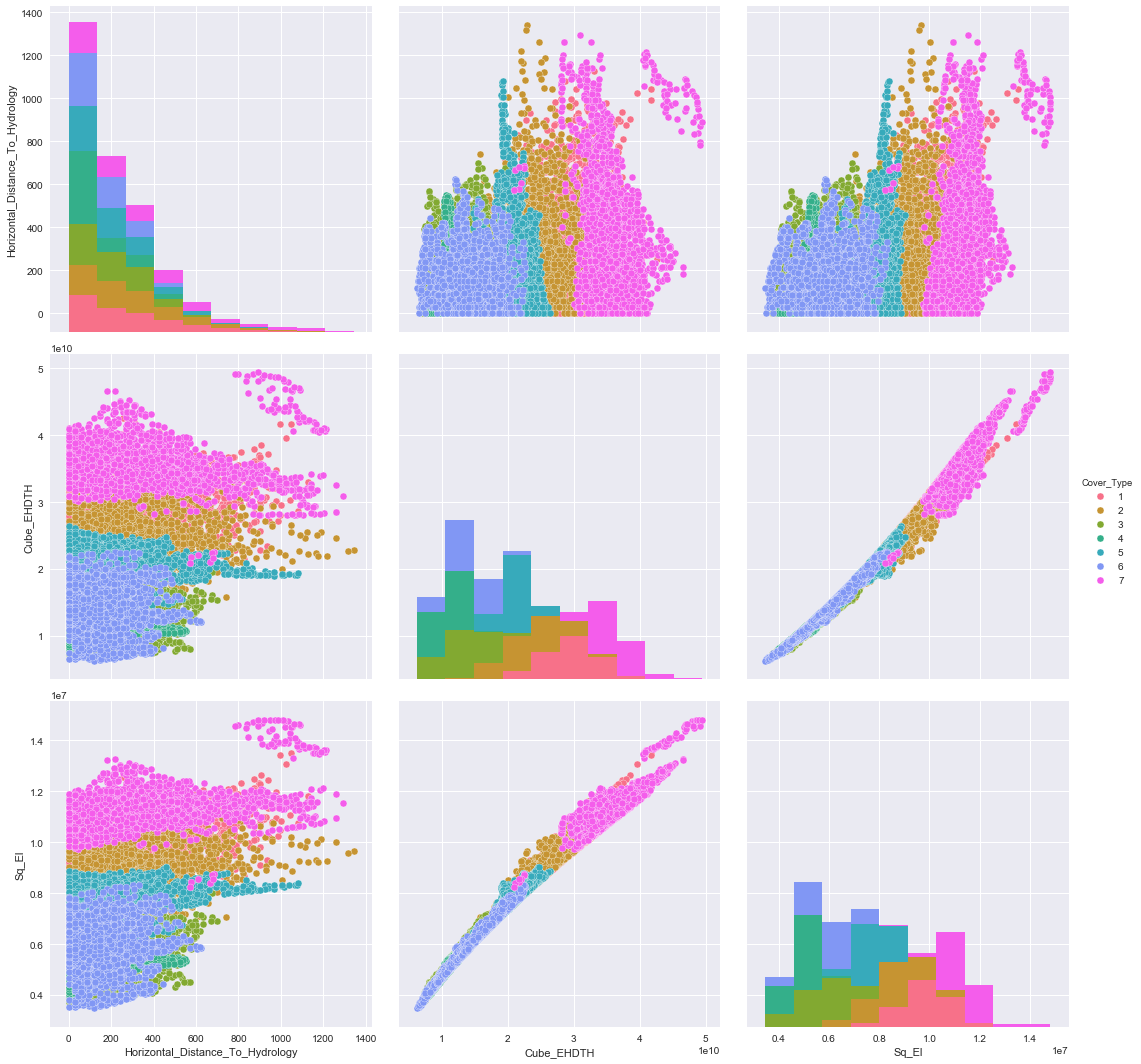

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["Horizontal_Distance_To_Hydrology", "Cube_EHDTH", "Sq_El"]
ax = sns.pairplot(data=new_ori_con_df, x_vars=features, 
                  y_vars=features, hue="Cover_Type", size=5)
plt.show()

# sns.boxplot(new_ori_con_df["Cover_Type"], new_ori_con_df["EHDTH"])
# plt.show()
# sns.boxplot(new_ori_con_df["Cover_Type"], new_ori_con_df["Elevation"])
# plt.show()
# sns.boxplot(new_ori_con_df["Cover_Type"], np.log(new_ori_con_df["EHDTH"]))
# plt.show()
# sns.boxplot(new_ori_con_df["Cover_Type"], np.log(new_ori_con_df["Elevation"]))
# plt.show()
# sns.boxplot(new_ori_con_df["Cover_Type"], np.log(new_ori_con_df["Sq_EHDTH"]))
# plt.show()
# sns.boxplot(new_ori_con_df["Cover_Type"], np.log(new_ori_con_df["Sq_El"]))
# plt.show()

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(new_ori_con_df["Aspect"], new_ori_con_df["Slope"], new_ori_con_df["Cover_Type"])
plt.show()

TypeError: Input z must be a 2D array.